# Food 101 Dataset Multiclass Classification Using CNN
Get the Dataset [here](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

In [ ]:
# Getting the Data
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-13 06:05:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  74.8MB/s    in 7.3s    

2022-07-13 06:06:05 (67.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Lets Walk through the Directories

import os

for dirpath, dirname, files in os.walk('10_food_classes_all_data'):
    print(f' {dirpath} -------->{len(dirname)} folders :: {len(files)} files')

 10_food_classes_all_data -------->2 folders :: 0 files
 10_food_classes_all_data/train -------->10 folders :: 0 files
 10_food_classes_all_data/train/fried_rice -------->0 folders :: 750 files
 10_food_classes_all_data/train/pizza -------->0 folders :: 750 files
 10_food_classes_all_data/train/sushi -------->0 folders :: 750 files
 10_food_classes_all_data/train/ice_cream -------->0 folders :: 750 files
 10_food_classes_all_data/train/chicken_wings -------->0 folders :: 750 files
 10_food_classes_all_data/train/ramen -------->0 folders :: 750 files
 10_food_classes_all_data/train/chicken_curry -------->0 folders :: 750 files
 10_food_classes_all_data/train/grilled_salmon -------->0 folders :: 750 files
 10_food_classes_all_data/train/steak -------->0 folders :: 750 files
 10_food_classes_all_data/train/hamburger -------->0 folders :: 750 files
 10_food_classes_all_data/test -------->10 folders :: 0 files
 10_food_classes_all_data/test/fried_rice -------->0 folders :: 250 files
 10_foo

In [ ]:
# Getting all the class names
import pathlib
import random
import numpy as np



class_path = pathlib.Path('10_food_classes_all_data/train/')  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in class_path.glob('*')])) # created a list of class_names from the subdirectories
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Visualizing the Data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_image(path , class_name = None, show_all = False, row_col:tuple = None, figsize = (20,7)):

    """
    Function return a Sample image from given path and class name and plots it

    If You want to plot all the possible class then must provide the row and cols as a tuple and 
    play with the figsize to plot Properly

    row * cols must be > total classes
    """
    if not path.endswith('/'):
        path = path + '/'
    else :
        pass


    if show_all is False:

        full_path = path + class_name + '/'
        # Sample a image from path
        sample_image = random.sample(os.listdir(full_path), 1)
        image_path = full_path + sample_image[0]
        # print(full_path)
        # print(image_path)

        #reading the image
        image = mpimg.imread(image_path)

        # Plotting the image
        plt.figure(figsize = figsize)
        plt.imshow(image)
        plt.title(f'{class_name}  shape: {image.shape}')
        plt.axis(False)
        plt.show()

    elif show_all is True and row_col is not None:
        class_path = pathlib.Path('10_food_classes_all_data/train/')  # turn our training path into a Python path
        class_names = [item.name for item in class_path.glob('*')] # created a list of class_names from the subdirectories
        total_classes = len(class_names)

        if (row_col[0] * row_col[1]) < total_classes:
            raise ValueError(' Provide Valid row and column values to plot all CLass. (i.e. Row * columns > Total classes)')

        i = 1
        # fig, ax =  plt.subplot(row_col[0], row_col[1], total_plots)
        plt.figure(figsize = figsize)

        for oneclass in class_names:
            full_path = path + oneclass + '/'

            plt.subplot(row_col[0], row_col[1], i)
            sample_image = random.sample(os.listdir(full_path), 1)
            image_path = full_path + sample_image[0]
            # print(full_path)
            # print(image_path)

            #reading the image
            image = mpimg.imread(image_path)

            # Plotting the image
            plt.imshow(image)
            plt.title(f'{oneclass}  shape: {image.shape}')
            # plt.axis(False)
            i+=1
            plt.tight_layout()
        plt.show()


    # return image

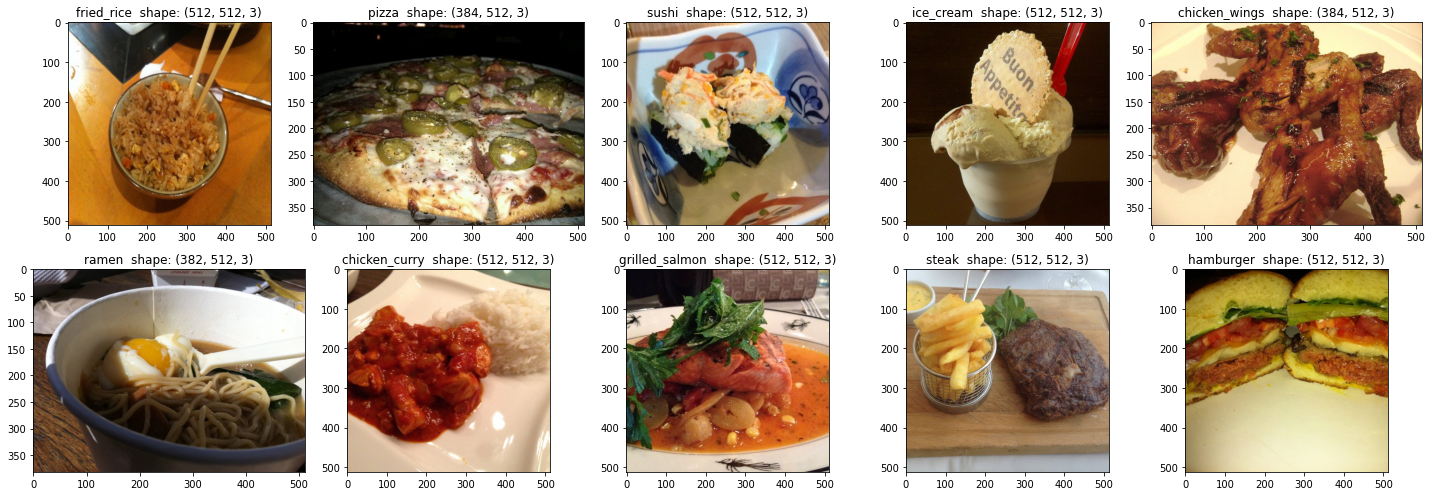

In [ ]:
show_random_image('10_food_classes_all_data/test/',show_all = True, row_col = (2,5))

# Preprocessing the Dataset

In [ ]:
from numpy.core.fromnumeric import reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting train and test path
train_path = '10_food_classes_all_data/train/'
valid_path = '10_food_classes_all_data/test/'

# instanciate the ImageDataGenerator
train_datagen_augmented = ImageDataGenerator( rescale = 1./255,
                                    vertical_flip = True,
                                    horizontal_flip = True,
                                    # shear_range=0.2, # shear the image
                                    zoom_range=0.2, # zoom into the image
                                    width_shift_range=0.1, # shift the image width ways
                                    height_shift_range=0.1, # shift the image height ways
                                    rotation_range=20) # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                           

train_datagen = ImageDataGenerator(rescale=1/255.) 


valid_datagen = ImageDataGenerator( rescale = 1./255)


# Create the Dataset

shuffle_nob = True

train_data_augmented = train_datagen_augmented.flow_from_directory(train_path,
                                               target_size = (512,512),
                                               shuffle = shuffle_nob,
                                               class_mode = 'categorical', 
                                               batch_size = 64
                                               )

train_data = train_datagen.flow_from_directory(train_path,
                                               target_size = (512,512),
                                               shuffle = shuffle_nob,
                                               class_mode = 'categorical', 
                                               batch_size = 64
                                               )

valid_data = valid_datagen.flow_from_directory(valid_path,
                                               target_size = (512,512),
                                               class_mode = 'categorical', 
                                               batch_size = 64
                                               )


Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
'''
NOTE : only works if suffle is False on above cell

This Plots Original image and Augmented Image for Comparision
'''
if shuffle_nob is False :
    # Get data batch samples
    images, labels = train_data.next()
    augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

    # Show original image and augmented image
    random_number = random.randint(0, 64) # we're making batches of size 32, so we'll get a random instance
    plt.imshow(images[random_number])
    plt.title(f"Original image")
    plt.axis(False)
    plt.figure()
    plt.imshow(augmented_images[random_number])
    plt.title(f"Augmented image")
    plt.axis(False);
else:
    print( 'SET shuffle_nob to False in previous(Above) cell to see the original and Augmented Image side by side')

SET shuffle_nob to False in previous(Above) cell to see the original and Augmented Image side by side


Text(0.5, 1.0, 'ice_cream')

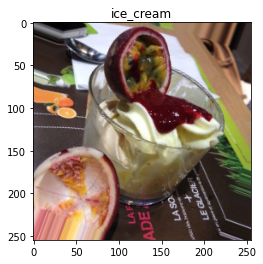

In [ ]:
# show random augmented image 
aug_imgs , aug_labels = train_data_augmented.next() # Loads the augmented data
num = random.randint(0,len(aug_imgs))               # generates random number
title = class_names[np.argmax(aug_labels[num])]     # set title

plt.imshow(aug_imgs[num])
plt.title(title)

# Building CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
cnn_model = keras.models.Sequential([
                                     layers.Conv2D(filters = 20, 
                                                   kernel_size = 3, 
                                                   strides = 2, 
                                                   padding = 'valid',
                                                   activation = 'relu'),

                                    layers.MaxPool2D(2),

                                    layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),
                                     
                                    layers.MaxPool2D(2),
                                     
                                    # layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),

                                     
                                    layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),
                                    layers.Flatten(),
                                    layers.Dense(20, activation='relu'),
                                    layers.Dense(10, activation = 'softmax')
])

# compile

cnn_model.compile( loss = keras.losses.CategoricalCrossentropy(), 
                  optimizer= keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# fitting

history = cnn_model.fit(train_data, epochs = 20, steps_per_epoch  = len(train_data), validation_data = valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/20
118/118 [==============================] - 45s 380ms/step - loss: 2.2312 - accuracy: 0.1560 - val_loss: 2.1835 - val_accuracy: 0.1708
Epoch 2/20
118/118 [==============================] - 43s 368ms/step - loss: 2.1311 - accuracy: 0.2133 - val_loss: 2.1179 - val_accuracy: 0.2076
Epoch 3/20
118/118 [==============================] - 44s 372ms/step - loss: 2.0417 - accuracy: 0.2637 - val_loss: 1.9980 - val_accuracy: 0.2948
Epoch 4/20
118/118 [==============================] - 44s 371ms/step - loss: 1.9479 - accuracy: 0.3077 - val_loss: 1.9262 - val_accuracy: 0.3212
Epoch 5/20
118/118 [==============================] - 43s 368ms/step - loss: 1.8853 - accuracy: 0.3373 - val_loss: 1.9163 - val_accuracy: 0.3204
Epoch 6/20
118/118 [==============================] - 44s 372ms/step - loss: 1.8106 - accuracy: 0.3661 - val_loss: 1.8803 - val_accuracy: 0.3364
Epoch 7/20
118/118 [==============================] - 43s 364ms/step - loss: 1.7274 - accuracy: 0.3952 - val_loss: 1.8992 - val_ac

In [ ]:
import pandas as pd
from datetime import datetime as dt

data = pd.DataFrame(history.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,2.231160,0.156000,2.183535,0.1708
1,2.131131,0.213333,2.117919,0.2076
2,2.041719,0.263733,1.998000,0.2948
3,1.947864,0.307733,1.926202,0.3212
4,1.885328,0.337333,1.916266,0.3204


In [ ]:
# Plotting Model Performance
def plot_model_performance(history, figsize=(25,7)):

    data = pd.DataFrame(history.history)
    data.head()
    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.plot(data.loss, label = 'loss')
    plt.plot(data.val_loss, label = 'val_loss')

    plt.legend()
    plt.title('Model_preformance')
    plt.xlabel('Epochs')
    plt.ylabel('Performance')
    plt.grid(True)


    # plt.plot(data.precision_1, label = 'precision')
    # plt.plot(data.recall_1 ,linestyle = 'dashed' ,label = 'recall')

    plt.subplot(1,2,2)
    plt.plot(data.accuracy ,linestyle = 'dashed' ,label = 'accuracy')
    plt.plot(data.val_accuracy, marker = 'o', label = 'val_accuracy')
    # plt.plot(data.val_precision_1, label = 'val_precision')
    # plt.plot(data.val_recall_1, marker = 'o', label = 'val_recall')

    plt.legend()
    plt.title('Model_preformance')
    plt.xlabel('Epochs')
    plt.ylabel('Performance')
    plt.grid(True)

    plt.savefig(f'Model_preformance_{dt.now()}.jpg')

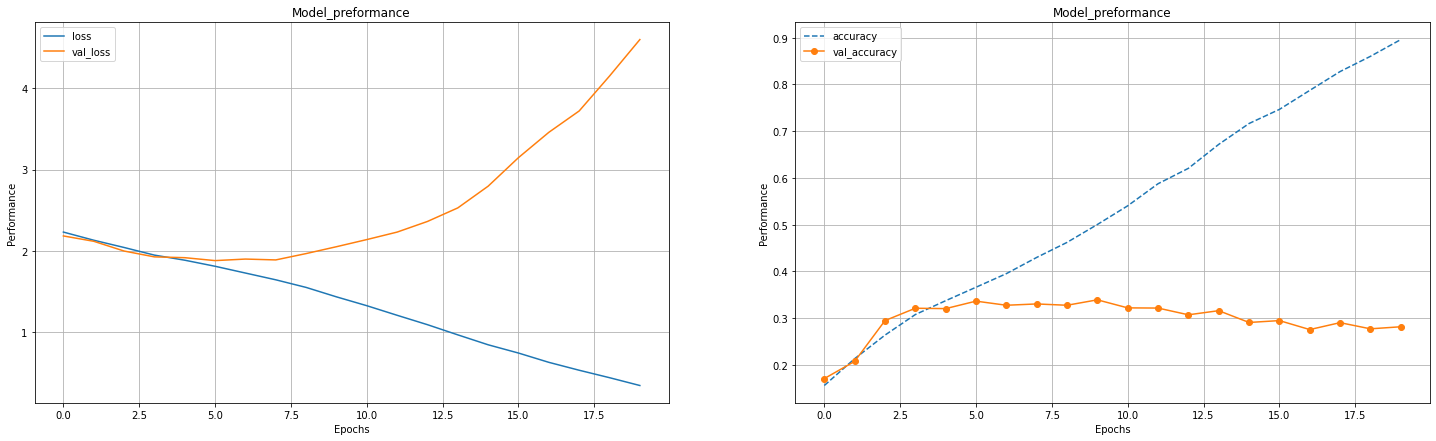

In [ ]:
plot_model_performance(history)

In [ ]:
model1_loss_acc = cnn_model.evaluate(valid_data)

40/40 [==============================] - 11s 269ms/step - loss: 4.5986 - accuracy: 0.2816


# MODEL IS OVERFITTING !!!!!!!!!!!!!! 😮 (NOT DESIRABLE)

* **Simiplify** the Model
* **Get more Data** : the more the better
* **Dropout** : Drop some random units (if You have any) # we don't have much here

## Solution 1: Simplify the Model (Reduce the layers)

In [ ]:
cnn1 = keras.models.Sequential([
                                     layers.Conv2D(filters = 10,                    # reduced the filters
                                                   kernel_size = 3, 
                                                   strides = 2, 
                                                   padding = 'valid',
                                                   activation = 'relu'),

                                    layers.MaxPool2D(2),                            # less conv2d layers

                                    layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),
                                     
                                    layers.MaxPool2D(2),cnn1 = keras.models.Sequential([
                                     layers.Conv2D(filters = 10,                    # reduced the filters
                                                   kernel_size = 3, 
                                                   strides = 2, 
                                                   padding = 'valid',
                                                   activation = 'relu'),

                                    layers.MaxPool2D(2),                            # less conv2d layers

                                    layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),
                                     
                                    layers.MaxPool2D(2),
                                     
                                    layers.Flatten(),
                                    layers.Dense(20, activation='relu'),
                                    layers.Dropout(.4),                             # Used Dropout
                                    layers.Dense(10, activation = 'softmax')
])

# compile

cnn1.compile( loss = keras.losses.CategoricalCrossentropy(), 
                  optimizer= keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# fitting

history_1 = cnn1.fit(train_data, epochs = 10, steps_per_epoch  = len(train_data), validation_data = valid_data, 
                        validation_steps = len(valid_data))
                                     
                                    layers.Flatten(),
                                    layers.Dense(20, activation='relu'),
                                    layers.Dropout(.4),                             # Used Dropout
                                    layers.Dense(10, activation = 'softmax')
])

# compile

cnn1.compile( loss = keras.losses.CategoricalCrossentropy(), 
                  optimizer= keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# fitting

history_1 = cnn1.fit(train_data, epochs = 10, steps_per_epoch  = len(train_data), validation_data = valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/20
118/118 [==============================] - 47s 389ms/step - loss: 2.2818 - accuracy: 0.1317 - val_loss: 2.2267 - val_accuracy: 0.2164
Epoch 2/20
118/118 [==============================] - 43s 368ms/step - loss: 2.2080 - accuracy: 0.1767 - val_loss: 2.1593 - val_accuracy: 0.2404
Epoch 3/20
118/118 [==============================] - 45s 378ms/step - loss: 2.1593 - accuracy: 0.2003 - val_loss: 2.0905 - val_accuracy: 0.2860
Epoch 4/20
118/118 [==============================] - 44s 372ms/step - loss: 2.1190 - accuracy: 0.2132 - val_loss: 2.0802 - val_accuracy: 0.2500
Epoch 5/20
118/118 [==============================] - 43s 368ms/step - loss: 2.0616 - accuracy: 0.2372 - val_loss: 2.0383 - val_accuracy: 0.2848
Epoch 6/20
118/118 [==============================] - 43s 367ms/step - loss: 2.0392 - accuracy: 0.2448 - val_loss: 2.0050 - val_accuracy: 0.2988
Epoch 7/20
118/118 [==============================] - 44s 375ms/step - loss: 1.9857 - accuracy: 0.2636 - val_loss: 2.0127 - val_ac

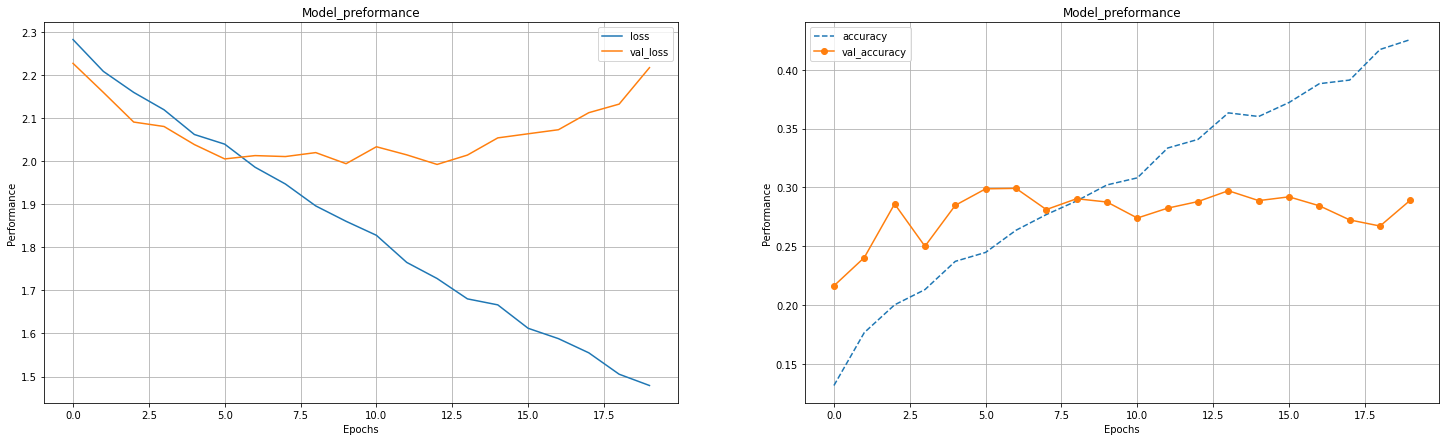

In [ ]:
plot_model_performance(history_1)

In [ ]:

model2_loss_acc = cnn1.evaluate(valid_data)
model2_loss_acc, model1_loss_acc # Loss decreased 

40/40 [==============================] - 14s 343ms/step - loss: 2.2167 - accuracy: 0.2892


([2.216695785522461, 0.2892000079154968],
 [4.598613262176514, 0.2815999984741211])

 Model Improved just a little.

## Solution 2 : Get More Data ( we will use Augmentation data for better generalization)

In [ ]:

cnn2 = keras.models.Sequential([
                                     layers.Conv2D(filters = 10,                    # reduced the filters
                                                   kernel_size = 3, 
                                                   strides = 2, 
                                                   padding = 'valid',
                                                   activation = 'relu'),

                                    layers.MaxPool2D(2),                            # less conv2d layers

                                    layers.Conv2D(10, 3, 1, padding = 'valid',activation = 'relu'),
                                     
                                    layers.MaxPool2D(2),
                                     
                                    layers.Flatten(),
                                    layers.Dense(20, activation='relu'),
                                    # layers.Dropout(.4),                             # Used Dropout
                                    layers.Dense(10, activation = 'softmax')
])

# compile

cnn2.compile( loss = keras.losses.CategoricalCrossentropy(), 
                  optimizer= keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# fitting

history_2 = cnn2.fit(train_data_augmented, epochs = 10, steps_per_epoch  = len(train_data_augmented), validation_data = valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/10
118/118 [==============================] - 136s 1s/step - loss: 2.3152 - accuracy: 0.1112 - val_loss: 2.3024 - val_accuracy: 0.1036
Epoch 2/10
118/118 [==============================] - 127s 1s/step - loss: 2.2994 - accuracy: 0.1183 - val_loss: 2.2921 - val_accuracy: 0.1352
Epoch 3/10
118/118 [==============================] - 127s 1s/step - loss: 2.2889 - accuracy: 0.1323 - val_loss: 2.2731 - val_accuracy: 0.1488
Epoch 4/10
118/118 [==============================] - 128s 1s/step - loss: 2.2769 - accuracy: 0.1308 - val_loss: 2.2415 - val_accuracy: 0.1484
Epoch 5/10
118/118 [==============================] - 138s 1s/step - loss: 2.2640 - accuracy: 0.1300 - val_loss: 2.2306 - val_accuracy: 0.1428
Epoch 6/10
118/118 [==============================] - 137s 1s/step - loss: 2.2551 - accuracy: 0.1375 - val_loss: 2.2439 - val_accuracy: 0.1472
Epoch 7/10
118/118 [==============================] - 127s 1s/step - loss: 2.2437 - accuracy: 0.1472 - val_loss: 2.2029 - val_accuracy: 0.1508

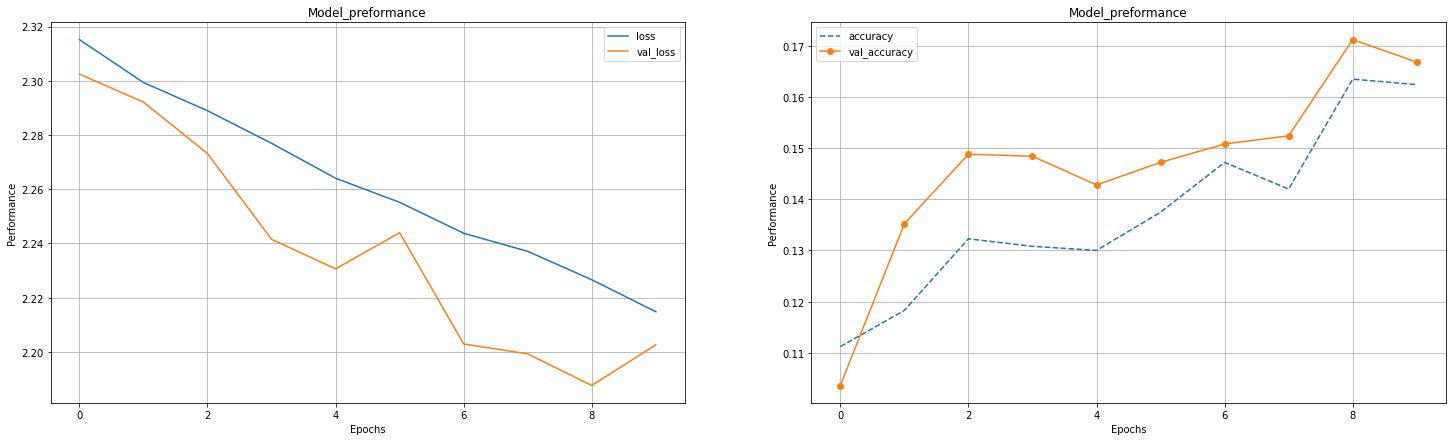

In [ ]:
plot_model_performance(history_2)

In [ ]:
cnn2.evaluate(valid_data)

40/40 [==============================] - 11s 266ms/step - loss: 2.2026 - accuracy: 0.1668


[2.2026162147521973, 0.16680000722408295]

0

 Now the Model is not overfitting but the Accuracy is very low. Training for more epochs will increase the accuracy

In [ ]:
cnn3 = keras.models.Sequential([
                                     layers.Conv2D(filters = 10,                    # reduced the filters
                                                   kernel_size = 3, 
                                                   strides = 2, 
                                                   padding = 'valid',
                                                   activation = 'relu'),

                                    layers.MaxPool2D(2),                            # less conv2d layers

                                    layers.Conv2D(5, 3, 1, padding = 'valid',activation = 'relu'),
                                     
                                    layers.MaxPool2D(2),
                                     
                                    layers.Flatten(),
                                    layers.Dense(20, activation='relu'),
                                    # layers.Dropout(.4),                             # Used Dropout
                                    layers.Dense(10, activation = 'softmax')
])

# compile
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto')
os.system('rm -rf logdir')
!tensorboard --logdir= '/logdir/'

tensorb = tf.keras.callbacks.TensorBoard('./logdir/', update_freq=1)


cnn3.compile( loss = keras.losses.CategoricalCrossentropy(), 
                  optimizer= keras.optimizers.Adam(0.01),
                  metrics = ['accuracy'])

# fitting

history_3 = cnn3.fit(train_data_augmented, 
                     epochs = 10, 
                     steps_per_epoch = len(train_data_augmented),
                     validation_data = valid_data ,
                     validation_steps = len(valid_data),
                     callbacks = [early_stopping, tensorb])

usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--whatif-use-unsafe-custom-prediction YOUR_CUSTOM_PREDICT_FUNCTION.py]
   

KeyboardInterrupt: ignored

Above cell requires alot of computational power and Time , So Instead We will use Transfer Learning to achieve good result

# Check how to use Transfer Learning on the Other notebook